# Plotting

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_with_regimes(y, regimes, regime_colors=None, line_color='black', title='Regimes over time', ax: np.ndarray = None):
    """
    Plots a line chart with background colors highlighting different regimes.
    
    Args:
        x (np.ndarray): The x values (e.g., time).
        y (np.ndarray): The y values (e.g., the data to plot).
        regimes (np.ndarray): A vector indicating the regime for each x value.
        regime_colors (dict, optional): A dictionary mapping regime numbers to colors. If None, random colors will be used.
        line_color (str, optional): The color of the line plot. Default is 'black'.
        title (str, optional): The title of the plot. Default is 'Line Plot with Regime Backgrounds'.
    """
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(y))
    
    unique_regimes = np.unique(regimes)
    
    # Set default colors for regimes if no colors are provided
    if regime_colors is None:
        regime_colors = {regime: plt.cm.Set3(i / len(unique_regimes)) for i, regime in enumerate(unique_regimes)}
    
    # Highlight background for each regime
    start_idx = 0
    for i in range(1, len(x)):
        # If the regime changes or we reach the end, highlight the region
        if regimes[i] != regimes[start_idx] or i == len(x) - 1:
            end_idx = i if regimes[i] != regimes[start_idx] else i + 1  # Include the last point
            ax.axvspan(
                x[start_idx],
                x[end_idx - 1],
                color=regime_colors[regimes[start_idx]],
                alpha=0.3
            )
            start_idx = i
    
    # Plot the line chart
    ax.plot(x, y, color=line_color, lw=2)
    
    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    
    # Create a legend for the regimes
    # handles = [plt.Line2D([0], [0], color=regime_colors[regime], lw=6, label=f'Regime {regime}') for regime in unique_regimes]
    # ax.legend(handles=handles, loc='upper left')
    
    return ax

In [3]:
def plot_multiple_with_regimes(Xs: list, Zs: list, regime_colors: dict):
    n_rows = len(Xs)
    assert len(Xs) == len(Zs)
    fig, ax = plt.subplots(nrows=n_rows, sharex=True)
    plot_with_regimes(Xs[0], Zs[0], ax=ax[0], regime_colors=regime_colors)
    for a, X, Z in zip(ax, Xs, Zs):
        plot_with_regimes(X, Z, ax=a, regime_colors=regime_colors, title='')
    # for a in ax[:-1]:
        # a.get_legend().remove()
    return ax

In [4]:
def plot_parallel_multiple_with_regimes(
        Xs: list, Zs_a: list, Zs_b: list, regime_colors: dict
    ):
    n_rows = len(Xs)
    n_cols = 2
    assert len(Xs) == len(Zs_a)
    assert len(Xs) == len(Zs_b)

    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey=True)
    plot_with_regimes(Xs[0], Zs_a[0], ax=ax[0,0], regime_colors=regime_colors, title="Regimes as is")
    plot_with_regimes(Xs[0], Zs_b[0], ax=ax[0,1], regime_colors=regime_colors, title="Regimes +1")

    for a, X, Z in zip(ax[1:,0], Xs[1:], Zs_a[1:], strict=True):
        plot_with_regimes(X, Z, ax=a, regime_colors=regime_colors, title='')
    
    for a, X, Z in zip(ax[1:,1], Xs[1:], Zs_b[1:]):
        plot_with_regimes(X, Z, ax=a, regime_colors=regime_colors, title='')
    
    # for a in ax.flatten()[:-1]:
        # a.get_legend().remove()
    plt.tight_layout()
    return ax

In [5]:
import seaborn
def plot_transition_cost(tcm):
    seaborn.heatmap(tcm, annot=True, fmt=".1f", vmin=0)
def plot_parallel_transition_cost(tcm_a, tcm_b):
    vmax = max(
        np.max(tcm_a[np.isfinite(tcm_a)]),
        np.max(tcm_b[np.isfinite(tcm_b)]),
    )
    fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
    seaborn.heatmap(tcm_a, annot=True, fmt=".1f", ax=ax[0], vmin=0, vmax=vmax, cbar=False)
    seaborn.heatmap(tcm_b, annot=True, fmt=".1f", ax=ax[1], vmin=0, vmax=vmax)

In [6]:
y = np.random.rand(20) + 5
r = [0] * 8 + [1] * 6 + [0] * 6
r = np.array(r)

In [7]:
y.shape, np.array(r).shape

((20,), (20,))

<Axes: title={'center': 'Regimes over time'}, xlabel='X', ylabel='Y'>

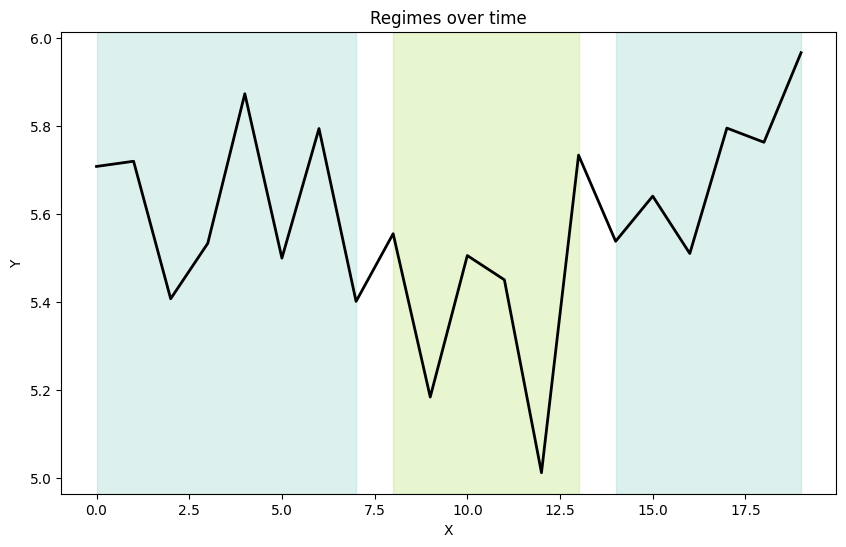

In [8]:
plot_with_regimes(y, r)

---
---
# Data

In [9]:
np.random.seed(4)

In [10]:
regimes = [0, 1, 2, 1, 3]
n_samples_per_regime = [300, 100, 99, 100, 200]

In [11]:
colors = {i: plt.cm.Set3(i / len(regimes)) for i in regimes}
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple'}
colors

{0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple'}

In [12]:
means = [
    np.array([0.0, 0.0]),    # Mean of regime 1
    np.array([5.0, 5.0]),    # Mean of regime 2
    np.array([10.0, 10.0]),   # Mean of regime 3
    np.array([5.0, 5.0]),    # Mean of regime 2
    np.array([2.0, 20.0]),    # Mean of regime 4
]

covariances = [
    np.array([[1.0, 0.2], [0.2, 1.0]]),   # Covariance of regime 1
    np.array([[1.5, -0.4], [-0.4, 1.0]]), # Covariance of regime 2
    np.array([[0.8, 0.3], [0.3, 1.2]]),   # Covariance of regime 3
    np.array([[1.5, -0.4], [-0.4, 1.0]]), # Covariance of regime 2
    np.array([[1.0, 0.0], [0.0, 1.5]]),    # Covariance of regime 4
]
X2 = np.vstack([
        np.random.multivariate_normal(m, c, n)
        for m, c, n in zip(means, covariances, n_samples_per_regime)
])

Z2 = np.hstack([
    np.full(n, i)
    for i, n in zip(regimes, n_samples_per_regime)
])

<Axes: title={'center': 'Regimes over time'}, xlabel='X', ylabel='Y'>

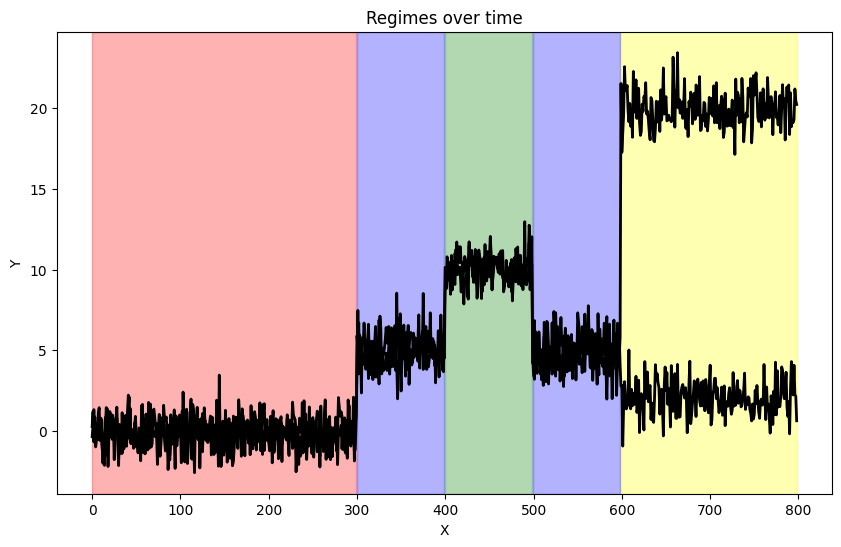

In [13]:
plot_with_regimes(X2, Z2, regime_colors=colors)

In [14]:
means = [0, 5, 10, 5, 20]

covariances = [
    np.array([1.0]),   # Covariance of regime 1
    np.array([0.2]), # Covariance of regime 2
    np.array([1.8]),   # Covariance of regime 3
    np.array([0.2]), # Covariance of regime 2
    np.array([1.0]),    # Covariance of regime 4
]
X1 = np.concatenate([
        np.random.normal(m, size=n)#.clip(m - 5 * c, m + 5 * c)
        for m, c, n in zip(means, covariances, n_samples_per_regime)
])

Z1 = np.hstack([
    np.full(n, i)
    for i, n in zip(regimes, n_samples_per_regime)
])

In [15]:
X1[281] = X1[280] # fix for seed=4

<Axes: title={'center': 'Regimes over time'}, xlabel='X', ylabel='Y'>

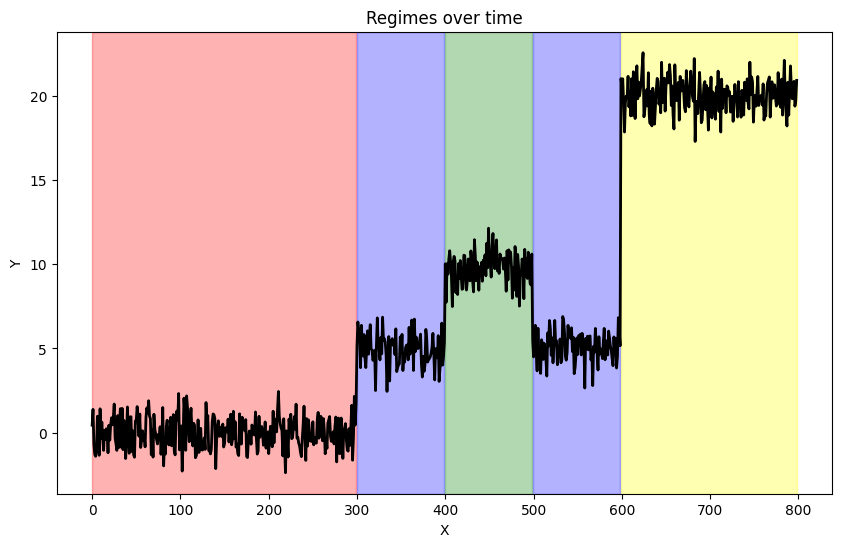

In [16]:
plot_with_regimes(X1, Z1, regime_colors=colors)

In [17]:
Xs = [X1[:i] for i in np.cumsum(n_samples_per_regime)[1:]]
Zs = [Z1[:i] for i in np.cumsum(n_samples_per_regime)[1:]]
# X0, Z0 = Xs[0], Zs[0]
# X1, Z1 = Xs[1], Zs[1]
# X2, Z2 = Xs[2], Zs[2]
# X3, Z3 = Xs[3], Zs[3]

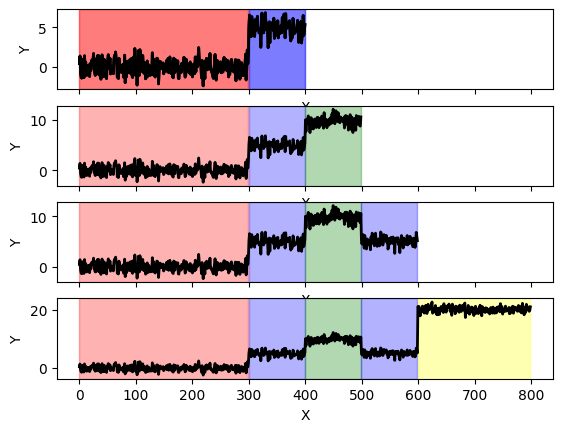

In [18]:
plot_multiple_with_regimes(Xs, Zs, regime_colors=colors);

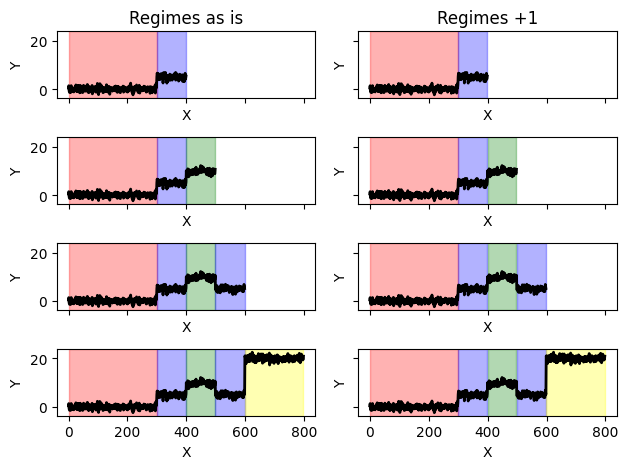

In [19]:
plot_parallel_multiple_with_regimes(Xs, Zs, Zs, regime_colors=colors);

---
---
# My implementation

In [19]:
from my_vhmm import MyVariationalGaussianHMM
from regime import get_transition_cost_matrix, calculate_total_cost, get_regime_map

fit a model(2) on 1 & 2

In [ ]:
model_0 = MyVariationalGaussianHMM(n_components=2)
model_0.fit(Xs[0][:, None], k=3)
Z_0_a = model_0.predict(Xs[0][:, None])

**emergence of new regime**<br>
fit a model(2) on 1 - 3 <br>
fit a model(3) on 1 - 3

In [ ]:
model_1_a = MyVariationalGaussianHMM(n_components=2)
model_1_a.fit(Xs[1][:, None], k=3)
Z_1_a = model_1_a.predict(Xs[1][:, None])
model_1_b = MyVariationalGaussianHMM(n_components=3)
model_1_b.fit(Xs[1][:, None], k=3)
Z_1_b = model_1_b.predict(Xs[1][:, None])

**not an emergence of a new regime**<br>
fit a model(3) on 1 - 4<br>
fit a model(4) on 1 - 4

In [ ]:
model_2_a = MyVariationalGaussianHMM(n_components=3)
model_2_a.fit(Xs[2][:, None], k=3)
Z_2_a = model_2_a.predict(Xs[2][:, None])
model_2_b = MyVariationalGaussianHMM(n_components=4)
model_2_b.fit(Xs[2][:, None], k=3)
Z_2_b = model_2_b.predict(Xs[2][:, None])

**emergence of a new regime**<br>
fit a model(3) on 1 - 5<br>
fit a model(4) on 1 - 5

In [ ]:
model_3_a = MyVariationalGaussianHMM(n_components=3)
model_3_a.fit(Xs[3][:, None], k=3)
Z_3_a = model_3_a.predict(Xs[3][:, None])
model_3_b = MyVariationalGaussianHMM(n_components=4)
model_3_b.fit(Xs[3][:, None], k=3)
Z_3_b = model_3_b.predict(Xs[3][:, None])

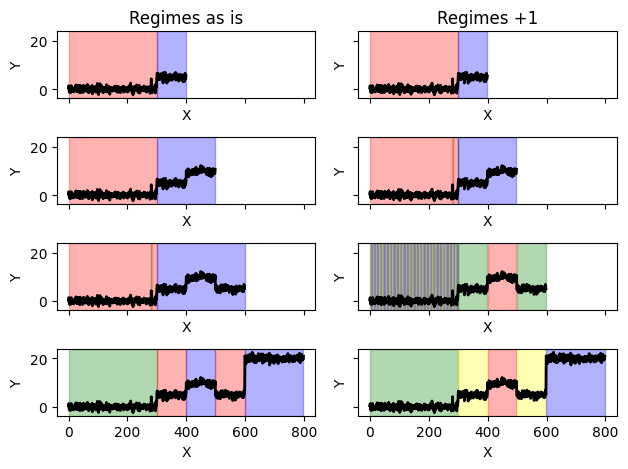

In [ ]:
ax = plot_parallel_multiple_with_regimes(
    Xs=Xs,
    Zs_a=[Z_0_a, Z_1_a, Z_2_a, Z_3_a],
    Zs_b=[Z_0_a, Z_1_b, Z_2_b, Z_3_b],
    regime_colors=colors
);

> **Note that this is without matching**

From this one example it seems that having a regime too many is not really an issue. The model might yet decide to not emit all regimes.

In [ ]:
# next up is probably tcms and total costs

In [ ]:
tcm_0_1_a = get_transition_cost_matrix(
    old_regimes=model_0.predict(Xs[1][:, None]),
    new_regimes=model_1_a.predict(Xs[1][:, None]),
    n_old_regimes=model_0.n_components,
    n_new_regimes=model_1_a.n_components,
    data=Xs[1],
)
tcm_0_1_b = get_transition_cost_matrix(
    old_regimes=model_0.predict(Xs[1][:, None]),
    new_regimes=model_1_b.predict(Xs[1][:, None]),
    n_old_regimes=model_0.n_components,
    n_new_regimes=model_1_b.n_components,
    data=Xs[1],
)
cost_0_1_a = calculate_total_cost(tcm_0_1_a, norm=model_0.n_components)
cost_0_1_b = calculate_total_cost(tcm_0_1_b, norm=model_0.n_components)

In [ ]:
model_1 = model_1_b # theoretically better

In [ ]:
tcm_1_2_a = get_transition_cost_matrix(
    old_regimes=model_1.predict(Xs[2][:, None]),
    new_regimes=model_2_a.predict(Xs[2][:, None]),
    n_old_regimes=model_1.n_components,
    n_new_regimes=model_2_a.n_components,
    data=Xs[2],
)
tcm_1_2_b = get_transition_cost_matrix(
    old_regimes=model_1.predict(Xs[2][:, None]),
    new_regimes=model_2_b.predict(Xs[2][:, None]),
    n_old_regimes=model_1.n_components,
    n_new_regimes=model_2_b.n_components,
    data=Xs[2],
)
cost_1_2_a = calculate_total_cost(tcm_1_2_a, norm=model_1.n_components)
cost_1_2_b = calculate_total_cost(tcm_1_2_b, norm=model_1.n_components)

In [ ]:
model_2 = model_2_a # theoretically better

In [ ]:
tcm_2_3_a = get_transition_cost_matrix(
    old_regimes=model_2.predict(Xs[3][:, None]),
    new_regimes=model_3_a.predict(Xs[3][:, None]),
    n_old_regimes=model_2.n_components,
    n_new_regimes=model_3_a.n_components,
    data=Xs[3],
)
tcm_2_3_b = get_transition_cost_matrix(
    old_regimes=model_2.predict(Xs[3][:, None]),
    new_regimes=model_3_b.predict(Xs[3][:, None]),
    n_old_regimes=model_2.n_components,
    n_new_regimes=model_3_b.n_components,
    data=Xs[3],
)
cost_2_3_a = calculate_total_cost(tcm_2_3_a, norm=model_2.n_components)
cost_2_3_b = calculate_total_cost(tcm_2_3_b, norm=model_2.n_components)

In [ ]:
model_3 = model_3_b # theoretically better

---

1 added regime

In [ ]:
print(
    f"Adding regime is {'indeed' if cost_0_1_b < cost_0_1_a else 'not'} cheaper."
)
cost_0_1_a, cost_0_1_b

Adding regime is not cheaper.


(0.0, 0.01000344567000866)

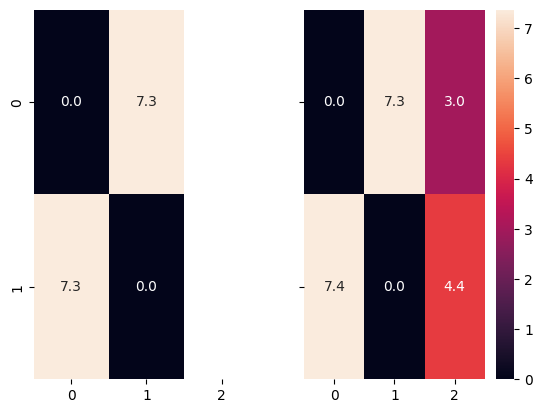

In [ ]:
plot_parallel_transition_cost(tcm_0_1_a, tcm_0_1_b)

No added regime

In [ ]:
print(
    f"Adding regime is {'indeed' if cost_1_2_a < cost_1_2_b else 'not'} more expensive."
)
cost_1_2_a, cost_1_2_b

Adding regime is indeed more expensive.


(0.41264839967091876, 1.5165767669677734)

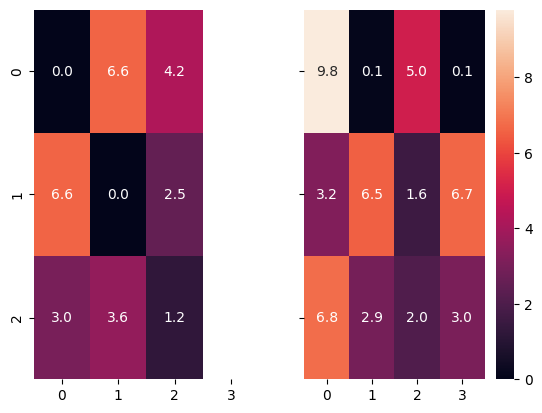

In [ ]:
plot_parallel_transition_cost(tcm_1_2_a, tcm_1_2_b)

One final new regime

In [ ]:
print(
    f"Adding regime is {'indeed' if cost_2_3_b < cost_2_3_a else 'not'} cheaper."
)
cost_2_3_a, cost_2_3_b

Adding regime is not cheaper.


(1.8929446538289387, 2.1456384658813477)

In [ ]:
# but model does not predict it??

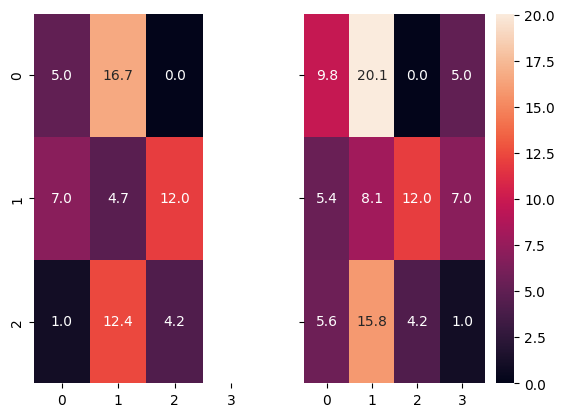

In [ ]:
plot_parallel_transition_cost(tcm_2_3_a, tcm_2_3_b)

# Lessons learned
- err on the side of adding a regime

# Now do the same but copy/transfer models
At each time point t, 3 models are considered:
- model_t-1: the previous model (not fitted on new data)
- model_t: a copy of model_t-1, fitted on all available data
- model_t_n+1: a copy of model_t-1 with an added regime, fitted on all available data

The one with the best bic score will be the new model.
Except when the new model 'collapses', i.e. emits less regimes than model_t-1, which should never happen. In this case model_t-1 is used.

> This is the result of some observations:
> - new models (n & n+1) being worse than the previous one
    - e.g. constant oscillation between regimes
> - new models collapsing

In [19]:
from my_vhmm import MyVariationalGaussianHMM
from regime import get_transition_cost_matrix, calculate_total_cost, get_regime_map

In [20]:
from regime import get_regime_map, add_extra_regime_to_map, transfer_model, copy_model

In [21]:
def new_model_collapsed(model_old, model_new, X):
    """New model emits less regimes than old one."""
    return len(np.unique(model_new.predict(X))) < \
        len(np.unique(model_old.predict(X)))

## model_0: fit a model(3) on 1 & 2

In [91]:
model_0 = MyVariationalGaussianHMM(n_components=2)
model_0.fit(Xs[0][:, None], k=3)

MyVariationalGaussianHMM(n_components=2, random_state=2, timestamp=1725978653)

In [90]:
np.unique(model_0.predict(Xs[0][:, None]))

array([0, 1, 2])

## model_1: fit 2 models on 1 - 3

In [92]:
model_0_1_a = transfer_model(model_0)
model_0_1_b = transfer_model(model_0, n_components=model_0.n_components + 1)

In [93]:
model_0_1_a.fit(Xs[1][:, None])
model_0_1_b.fit(Xs[1][:, None])

MyVariationalGaussianHMM(init_params='mc', n_components=3, random_state=2,
                         timestamp=1725978659)

In [94]:
bic_0 = model_0.bic(Xs[1][:, None])
bic_0_1_a = model_0_1_a.bic(Xs[1][:, None])
bic_0_1_b = model_0_1_b.bic(Xs[1][:, None])
bic_0, bic_0_1_a, bic_0_1_b

(3703.0541209750254, 2874.5058355621354, 1888.7116761112661)

In [95]:
_, model_1 = min(
    zip([bic_0, bic_0_1_a, bic_0_1_b], [model_0, model_0_1_a, model_0_1_b])
)
model_1

MyVariationalGaussianHMM(init_params='mc', n_components=3, random_state=2,
                         timestamp=1725978659)

In [96]:
if new_model_collapsed(model_new=model_1, model_old=model_0, X=Xs[1][:, None]):
    print("Model collapsed")
    model_1 = model_0

In [97]:
tcm_0_1 = get_transition_cost_matrix(
    old_regimes=model_0.predict(Xs[1][:, None]),
    new_regimes=model_1.predict(Xs[1][:, None]),
    n_old_regimes=model_0.n_components,
    n_new_regimes=model_1.n_components,
    data=Xs[1]
)
tcm_0_1

array([[0.00596744, 7.36507   , 1.7842654 ],
       [7.3709803 , 0.        , 5.597802  ]], dtype=float32)

In [98]:
mapping = get_regime_map(tcm_0_1)
if mapping.shape[0] < model_1.n_components:
    mapping = add_extra_regime_to_map(mapping)
model_1.mapping = mapping
mapping

array([[0, 0],
       [1, 1],
       [2, 2]], dtype=int64)

<Axes: title={'center': 'Regimes over time'}, xlabel='X', ylabel='Y'>

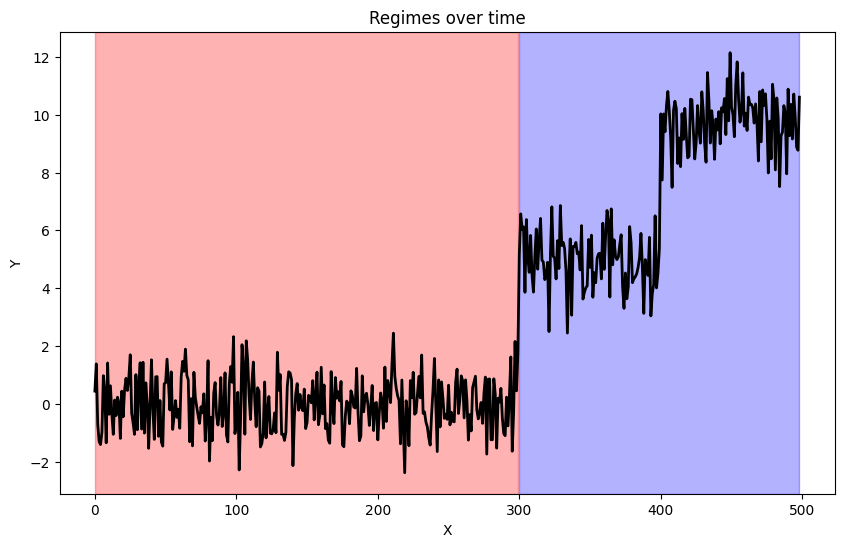

In [99]:
plot_with_regimes(Xs[1], model_0.predict(Xs[1][:, None]), regime_colors=colors)

<Axes: title={'center': 'Regimes over time'}, xlabel='X', ylabel='Y'>

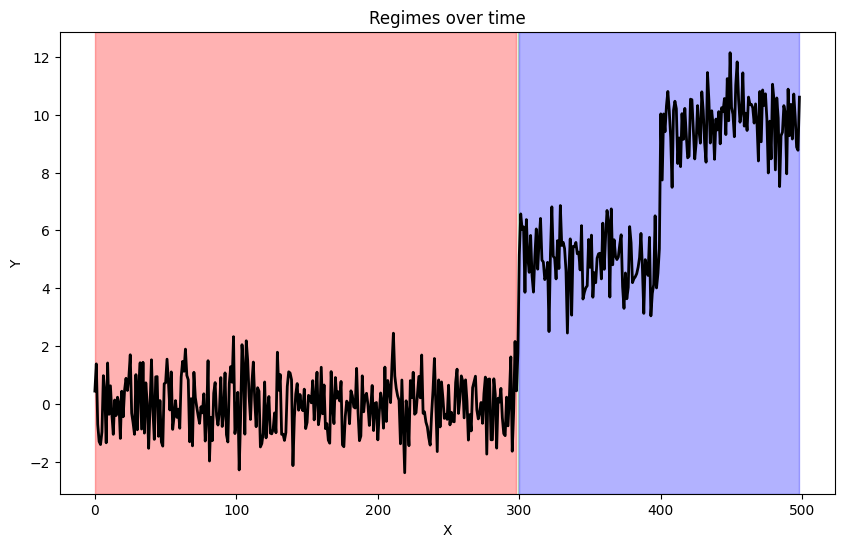

In [100]:
plot_with_regimes(Xs[1], model_1.predict(Xs[1][:, None]), regime_colors=colors)

## model_2: fit 2 models on 1 - 4

In [101]:
model_1_2_a = transfer_model(model_1)
model_1_2_b = transfer_model(model_1, n_components=model_1.n_components + 1)

In [102]:
model_1_2_a.fit(Xs[2][:, None])
model_1_2_b.fit(Xs[2][:, None])

MyVariationalGaussianHMM(init_params='mc', n_components=4, random_state=2,
                         timestamp=1725978685)

In [103]:
bic_1 = model_1.bic(Xs[2][:, None])
bic_1_2_a = model_1_2_a.bic(Xs[2][:, None])
bic_1_2_b = model_1_2_b.bic(Xs[2][:, None])
bic_1, bic_1_2_a, bic_1_2_b

(2352.78878261882, 2328.2557131220187, 1852.766157629308)

In [104]:
_, model_2 = min(
    zip([bic_1, bic_1_2_a, bic_1_2_b], [copy_model(model_1, True), model_1_2_a, model_1_2_b])
)
model_2

MyVariationalGaussianHMM(init_params='mc', n_components=4, random_state=2,
                         timestamp=1725978685)

In [105]:
if new_model_collapsed(model_new=model_2, model_old=model_1, X=Xs[2][:, None]):
    print("Model collapsed")
    model_2 = copy_model(model_1)

In [106]:
tcm_1_2 = get_transition_cost_matrix(
    old_regimes=model_1.predict(Xs[2][:, None]),
    new_regimes=model_2.predict(Xs[2][:, None]),
    n_old_regimes=model_1.n_components,
    n_new_regimes=model_2.n_components,
    data=Xs[2]
)
tcm_1_2

array([[0.01617977, 5.0401087 , 9.799648  , 2.192857  ],
       [6.6321893 , 1.575901  , 3.1836386 , 4.4231524 ],
       [1.7980491 , 3.2669303 , 8.02647   , 0.41967887]], dtype=float32)

In [107]:
mapping = get_regime_map(tcm_1_2)
if mapping.shape[0] < model_2.n_components:
    mapping = add_extra_regime_to_map(mapping)
model_2.mapping = mapping
mapping

array([[0, 0],
       [1, 1],
       [2, 3],
       [3, 2]], dtype=int64)

## model_3: fit 2 models on 1-5

In [108]:
model_2_3_a = transfer_model(model_2)
model_2_3_b = transfer_model(model_2, n_components=model_2.n_components + 1)

In [109]:
model_2_3_a.fit(Xs[3][:, None])
model_2_3_b.fit(Xs[3][:, None])

MyVariationalGaussianHMM(init_params='mc', n_components=5, random_state=2,
                         timestamp=1725978696)

In [110]:
bic_2 = model_2.bic(Xs[3][:, None])
bic_2_3_a = model_2_3_a.bic(Xs[3][:, None])
bic_2_3_b = model_2_3_b.bic(Xs[3][:, None])
bic_2, bic_2_3_a, bic_2_3_b

(18862.47355550267, 2461.370678620595, 4232.758899349643)

In [111]:
_, model_3 = min(
    zip([bic_2, bic_2_3_a, bic_2_3_b], [copy_model(model_2, True), model_2_3_a, model_2_3_b])
)
model_3

MyVariationalGaussianHMM(init_params='mc', n_components=4, random_state=2,
                         timestamp=1725978696)

In [112]:
if new_model_collapsed(model_new=model_3, model_old=model_2, X=Xs[3][:, None]):
    print("Model collapsed")
    model_3 = model_2

In [113]:
tcm_2_3 = get_transition_cost_matrix(
    old_regimes=model_2.predict(Xs[3][:, None]),
    new_regimes=model_3.predict(Xs[3][:, None]),
    n_old_regimes=model_2.n_components,
    n_new_regimes=model_3.n_components,
    data=Xs[3]
)
tcm_2_3

array([[ 9.815827  , 20.08215   ,  0.02209037,  5.0562882 ],
       [ 4.7595396 , 15.025862  ,  5.034198  ,  0.        ],
       [ 7.606791  , 17.873114  ,  2.1869464 ,  2.8472517 ],
       [ 6.867105  ,  3.3992171 , 16.660843  , 11.626645  ]],
      dtype=float32)

In [114]:
np.set_printoptions(suppress=True)

In [115]:
tcm_2_3.round(3)

array([[ 9.816, 20.082,  0.022,  5.056],
       [ 4.76 , 15.026,  5.034,  0.   ],
       [ 7.607, 17.873,  2.187,  2.847],
       [ 6.867,  3.399, 16.661, 11.627]], dtype=float32)

In [116]:
mapping = get_regime_map(tcm_2_3)
if mapping.shape[0] < model_3.n_components:
    mapping = add_extra_regime_to_map(mapping)
model_3.mapping = mapping
mapping

array([[0, 2],
       [1, 3],
       [2, 0],
       [3, 1]], dtype=int64)

## plotting

In [117]:
Z_0 = model_0.predict(Xs[0][:, None])
Z_1 = model_1.predict(Xs[1][:, None])
Z_2 = model_2.predict(Xs[2][:, None])
Z_3 = model_3.predict(Xs[3][:, None])

array([<Axes: xlabel='X', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>,
       <Axes: xlabel='X', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>],
      dtype=object)

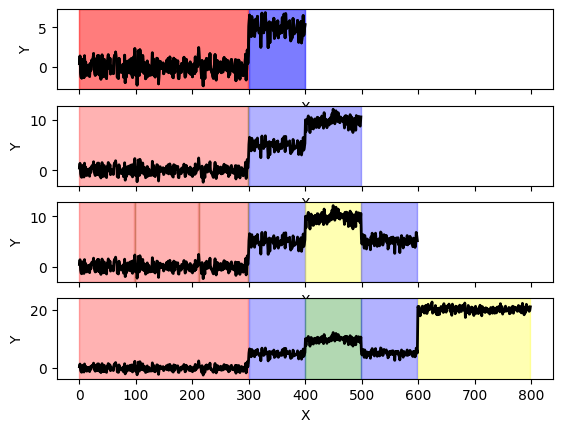

In [118]:
plot_multiple_with_regimes(
    Xs=Xs,
    Zs=[Z_0, Z_1, Z_2, Z_3],
    regime_colors=colors
)

## as good as it's going to get
- the transition from one regime to another is wrongly id'd as a regime itself
    - this is a limitation of my dummy data
- the mapping is consistent throughout
    - seems to be the previous error (regime transitions being their own regime) propagating
    - this transition regime in the 2nd row becomes large peaks in the 3rd row
    - it seems these large peaks are closer to what should have been the 3rd regime in the 4th row, than they are to the newly emerged 4th regime. In other words this new 4th regime is more similar to the 3rd regime of the previous row than that 3rd regime is to the 'peak' regime

# Again the same but using RegimeClassifier

In [20]:
from regime import RegimeClassifier

In [21]:
import logging
logging.basicConfig(level=logging.DEBUG)

In [22]:
rc = RegimeClassifier(n_components=[2, 3, 4])

In [23]:
rc.fit(Xs[0][:, None])

DEBUG:RegimeClassifier.root:Running initial fit with regimes: [2, 3, 4].
INFO:RegimeClassifier.root:Tracking [1/128] HMM's.
INFO:RegimeClassifier.root:Initial fit found best number of regimes to be 2


In [24]:
rc.fit(Xs[1][:, None])

DEBUG:RegimeClassifier.root:BIC scores are: (3703.0541249832277, 1834.5844102780293, 1510.870230090254).
INFO:RegimeClassifier.root:Upped from 2 to 3 regimes.
INFO:RegimeClassifier.root:Tracking [2/128] HMM's.


In [25]:
rc.fit(Xs[2][:, None])

DEBUG:RegimeClassifier.root:BIC scores are: (1788.859081196709, 2327.9543630268245, 1853.0384707028484).
INFO:RegimeClassifier.root:Tracking [3/128] HMM's.
INFO:RegimeClassifier.root:Reusing previous model.


In [26]:
rc.fit(Xs[3][:, None])

DEBUG:RegimeClassifier.root:BIC scores are: (18220.677670417335, 2940.296700526289, 3492.770910347047).
INFO:RegimeClassifier.root:Maintaining 3 regimes.
INFO:RegimeClassifier.root:Tracking [4/128] HMM's.


In [27]:
Zs_ = [model.predict(X[:, None]) for model, X in zip(rc.models, Xs)]

array([<Axes: xlabel='X', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>,
       <Axes: xlabel='X', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>],
      dtype=object)

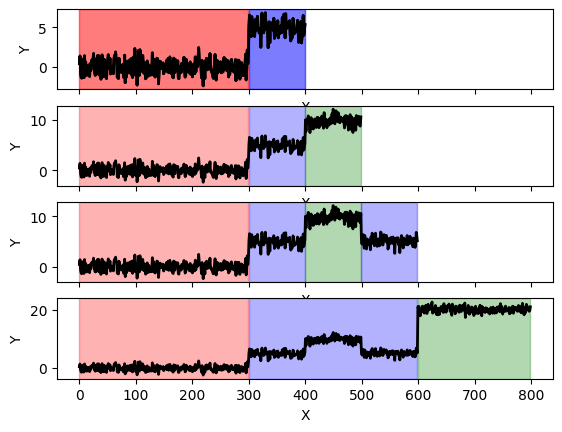

In [28]:
plot_multiple_with_regimes(Xs, Zs_, regime_colors=colors)

## I'm gonna call it here
I fear I can chase the perfect transfer learning forever.